<a href="https://colab.research.google.com/github/Srijamurug/Neuralnetwork-assign/blob/main/Digit_recognition_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Digit Recognition using Neural Network


**1. Importing necessary modules**

All the modules that we will require for training our model will first be imported. There are already certain datasets in the Keras library, and MNIST is one of them.  The training data, its labels, as well as the testing data and its labels, are returned to us by the mnist.load_data() method.

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#from Keras loading the MNIST dataset
#Splitting into train and test
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


**2.Preprocess the data**

We must execute some operations and process the data in order to prepare it for our neural network because the image data cannot be supplied straight into the model. 



In [ ]:
# sample is a 28x28 pixel image
x_train.shape

(60000, 28, 28)

In [ ]:
# data Exploration
y_train.shape

(60000,)

In [ ]:
len(x_train)

60000

In [ ]:
len(x_test)

10000

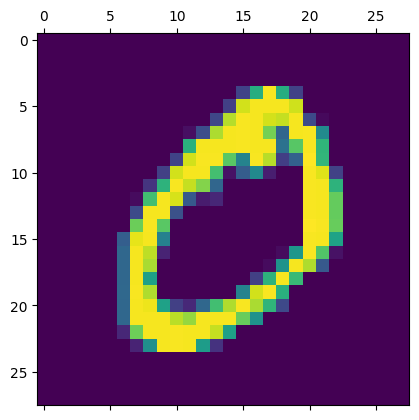

In [ ]:
plt.matshow(x_train[1])

In [ ]:
# Show first 6 data
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

**3. Flattening the training data and testing data**

Flattening our training dataset to make the training data(28x28) into a single column(array)

*2-dimensional array into a single array*

In [ ]:
#flattening x_train
x_train.shape #before flattening

(60000, 28, 28)

In [ ]:
#after flattening x_train
x_trainf=x_train.reshape(len(x_train),28*28)
x_trainf.shape

(60000, 784)

In [ ]:
#flattening x_test
x_test.shape #before flattening 

(10000, 28, 28)

In [ ]:
#after flattening x_test
x_testf=x_test.reshape(len(x_test),28*28) # after flatting
x_testf.shape

(10000, 784)

**4. Creating the Neural network**

In [ ]:
# Setting up the layers of the Neural  Network
model = keras.Sequential([
            keras.layers.Dense(10,input_shape=(784,), activation='sigmoid'),  
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(10, activation='sigmoid')])

In [ ]:
# Compiling the Neural Network
model.compile(optimizer='adam',  loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_trainf,y_train,batch_size=20,epochs=10)

Epoch 1/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.8382 - accuracy: 0.7020
Epoch 2/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.7340 - accuracy: 0.7436
Epoch 3/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6855 - accuracy: 0.7805
Epoch 4/10
3000/3000 [==============================] - 8s 3ms/step - loss: 0.6447 - accuracy: 0.7930
Epoch 5/10
3000/3000 [==============================] - 10s 3ms/step - loss: 0.6182 - accuracy: 0.8156
Epoch 6/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.6062 - accuracy: 0.8174
Epoch 7/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5900 - accuracy: 0.8233
Epoch 8/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5638 - accuracy: 0.8335
Epoch 9/10
3000/3000 [==============================] - 6s 2ms/step - loss: 0.5555 - accuracy: 0.8345
Epoch 10/10
3000/3000 [==============================] - 7s 2ms/step - loss: 0.54

In [ ]:
_,accuracy = model.evaluate(x_trainf, y_train)
print('Accuracy: %.2f' % (accuracy*100))


1875/1875 [==============================] - 3s 2ms/step - loss: 0.5055 - accuracy: 0.8525
Accuracy: 85.25


**5.Scaling the values** 

In [ ]:
#to improve the accuracy - scaling the values 
x_train=x_train/255
x_test=x_test/255

In [ ]:
x_train_s=x_train.reshape(len(x_train),28*28)
x_train_s.shape

(60000, 784)

In [ ]:
x_test_s=x_test.reshape(len(x_test),28*28) # after flatting
x_test_s.shape

(10000, 784)

In [ ]:
#after scaling 
model1 = keras.Sequential([
            keras.layers.Dense(10,input_shape=(784,), activation='sigmoid'),  
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(50, activation='relu'), 
            keras.layers.Dense(10, activation='sigmoid')])

In [ ]:
# Compiling the Neural Network after scaling the value
model1.compile(optimizer='adam',  loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

**6.Train the model**

The model.fit() function of Keras will start the training of the model. It takes the training data, validation data, epochs, and batch size.

In [ ]:
# Training the Neural Network
history=model1.fit(x_train_s,y_train,batch_size=50,epochs=10,validation_data=(x_test_s, y_test))

Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6056 - accuracy: 0.8225 - val_loss: 0.3073 - val_accuracy: 0.9103
Epoch 2/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2901 - accuracy: 0.9148 - val_loss: 0.2526 - val_accuracy: 0.9276
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2460 - accuracy: 0.9276 - val_loss: 0.2306 - val_accuracy: 0.9314
Epoch 4/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.2227 - accuracy: 0.9334 - val_loss: 0.2189 - val_accuracy: 0.9347
Epoch 5/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2061 - accuracy: 0.9384 - val_loss: 0.2240 - val_accuracy: 0.9328
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.1955 - accuracy: 0.9407 - val_loss: 0.2013 - val_accuracy: 0.9381
Epoch 7/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.1847 - accuracy: 0.9454 - val_loss: 0.1923 - val_accuracy:

In [ ]:
_,accuracy = model1.evaluate(x_train_s, y_train)
print('Accuracy: %.2f' % (accuracy*100))

1875/1875 [==============================] - 4s 2ms/step - loss: 0.1529 - accuracy: 0.9532
Accuracy: 95.32


**7. Evaluate the data**

 used to evaluate how good our model works

In [ ]:
model1.evaluate(x_test_s,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1943 - accuracy: 0.9434


[0.19429416954517365, 0.9434000253677368]

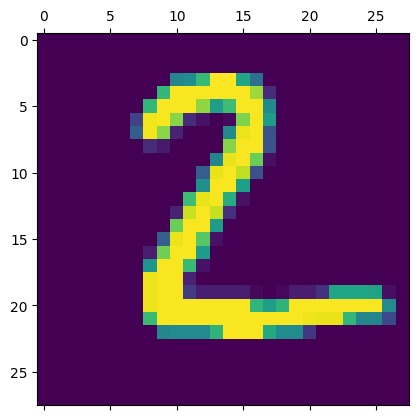

In [ ]:
plt.matshow(x_test[1])

In [ ]:
predicts=model1.predict(x_test_s)
predicts[1]

313/313 [==============================] - 1s 1ms/step


array([4.1834620e-04, 7.9016095e-01, 9.9899161e-01, 8.4642893e-01,
       9.8779807e-03, 7.9091275e-01, 4.8428398e-02, 6.6142969e-02,
       1.1792628e-03, 6.1275139e-05], dtype=float32)

In [ ]:
np.argmax(predicts[1])

2

In [ ]:
predicts_lables=[np.argmax(i) for i in predicts]
predicts_lables[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [ ]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

**8. Evaluation metrics**

In [ ]:
conf_matrix=tf.math.confusion_matrix(labels=y_test,predictions=predicts_lables)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    2,    3,    1,    4,    0,    2,    0,    2],
       [   0, 1111,    5,    7,    1,    2,    1,    2,    6,    0],
       [   6,    0,  969,   18,    8,    2,    6,    9,   13,    1],
       [   4,    0,   10,  955,    0,   16,    1,   10,    8,    6],
       [   2,    0,    5,    0,  939,    0,    4,    7,    1,   24],
       [  10,    3,    1,   43,    4,  794,   10,    5,   14,    8],
       [  13,    2,    5,    1,   15,   14,  902,    0,    6,    0],
       [   1,    5,   15,   12,    3,    1,    0,  973,    2,   16],
       [   5,    2,    5,   29,   10,   14,    4,    7,  888,   10],
       [   8,    3,    0,   12,   29,    5,    0,   10,    5,  937]],
      dtype=int32)>

Text(158.22222222222223, 0.5, 'Actual One')

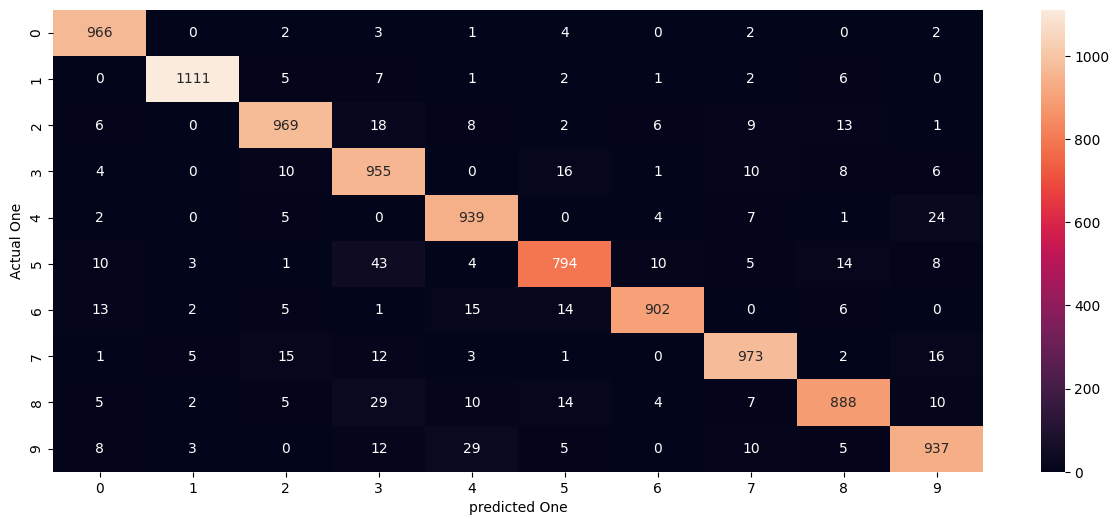

In [ ]:
# Heatmap using seaborn
import seaborn as sn
plt.figure(figsize=(15,6))
sn.heatmap(conf_matrix,annot=True,fmt="d")
plt.xlabel("predicted One")
plt.ylabel("Actual One")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicts_lables))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.95      0.94      0.95      1032
           3       0.88      0.95      0.91      1010
           4       0.93      0.96      0.94       982
           5       0.93      0.89      0.91       892
           6       0.97      0.94      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.94      0.91      0.93       974
           9       0.93      0.93      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [ ]:
predicts_lables[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

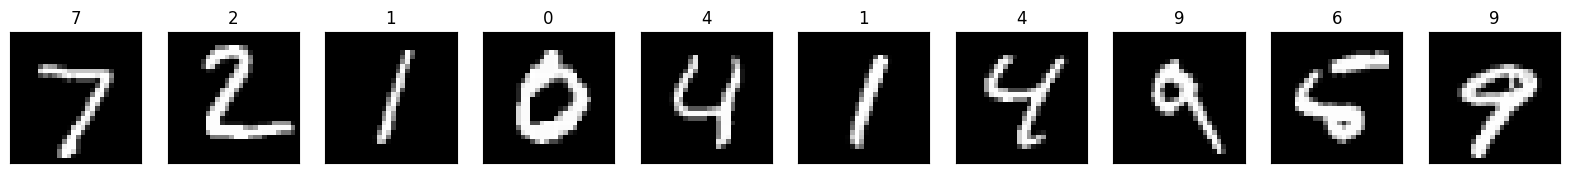

In [ ]:
fig, axes = plt.subplots(ncols=10, sharex=False,
                         sharey=True, figsize=(20, 4))
for i in range(10):
    axes[i].set_title(predicts_lables[i])
    axes[i].imshow(x_test[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

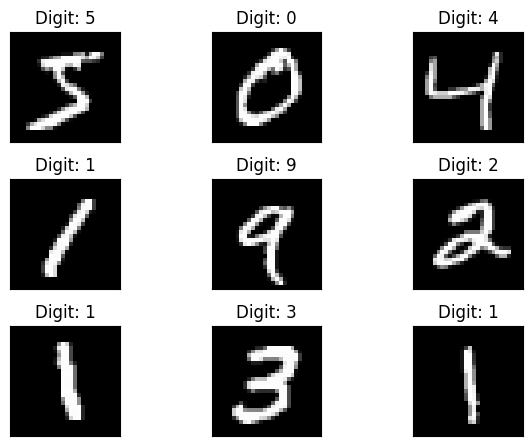

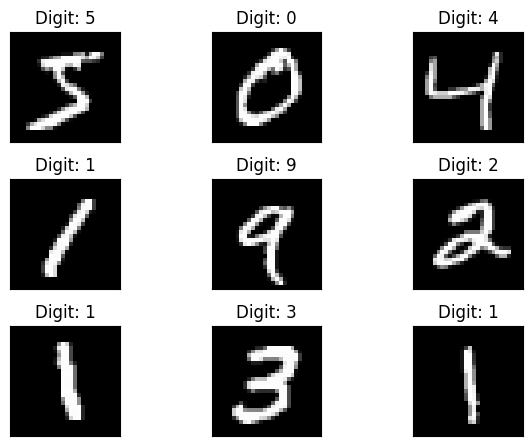

In [ ]:
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

**7. Prediction**

In [ ]:
 # to see which we predicted correctly and which not
correct_indices = np.nonzero(predicts_lables == y_test)[0]
incorrect_indices = np.nonzero(predicts_lables != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")



9434  classified correctly
566  classified incorrectly


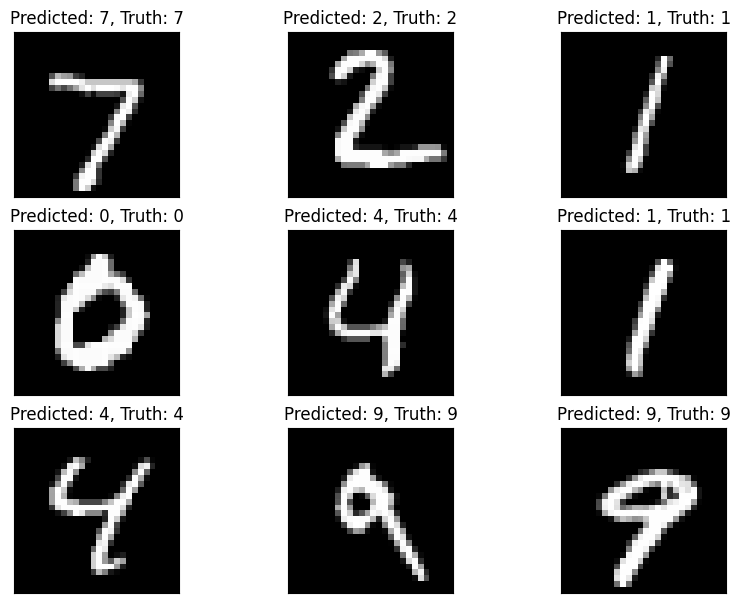

In [ ]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (10,15)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicts_lables[correct],
                                        y_test[correct])) #9434 are classified correctly 
    plt.xticks([])
    plt.yticks([])

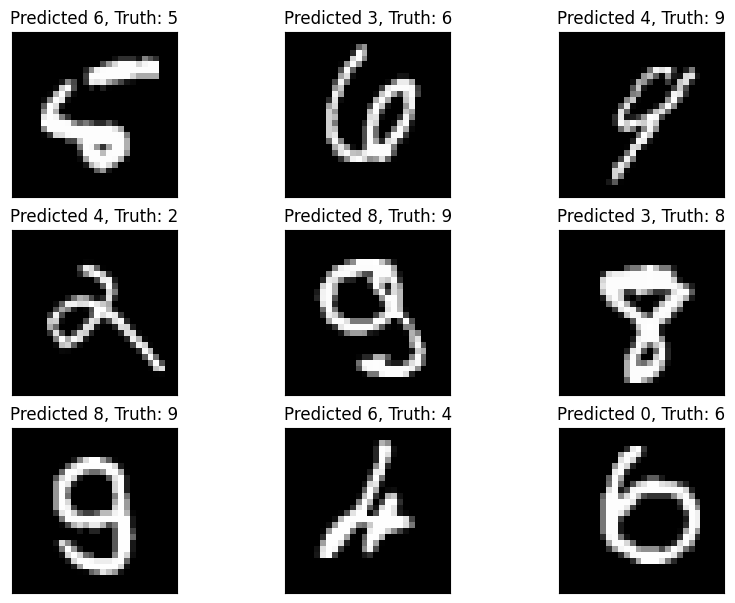

In [ ]:
# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicts_lables[incorrect], 
                                       y_test[incorrect]))  #566 are classified incorreclty
    plt.xticks([])
    plt.yticks([])

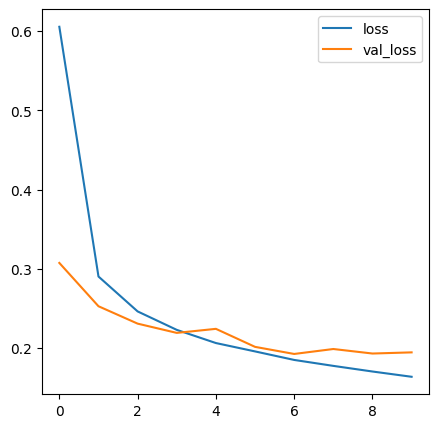

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

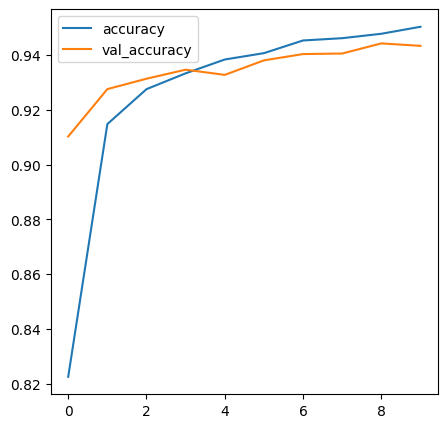

In [ ]:
plt.figure(figsize = (5,5))
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()